# Librairie tableaux, statistiques et data science : pandas

| pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.

Dans une distribution Anaconda, on installe le package pandas via l'Anaconda prompt. Veillez à bien être dans votre environnement virtuel au préalable.
```bash
conda install -c conda-forge pandas
```

In [1]:
import pandas as pd
print(pd.__version__)

1.5.1


In [2]:
print(pd)

<module 'pandas' from 'C:\\Users\\sdunesme\\Miniconda3\\envs\\formation\\lib\\site-packages\\pandas\\__init__.py'>


In [3]:
?pd

Type:        module
String form: <module 'pandas' from 'C:\\Users\\sdunesme\\Miniconda3\\envs\\formation\\lib\\site-packages\\pandas\\__init__.py'>
File:        c:\users\sdunesme\miniconda3\envs\formation\lib\site-packages\pandas\__init__.py
Docstring:  
pandas - a powerful data analysis and manipulation library for Python

**pandas** is a Python package providing fast, flexible, and expressive data
structures designed to make working with "relational" or "labeled" data both
easy and intuitive. It aims to be the fundamental high-level building block for
doing practical, **real world** data analysis in Python. Additionally, it has
the broader goal of becoming **the most powerful and flexible open source data
analysis / manipulation tool available in any language**. It is already well on
its way toward this goal.

Main Features
-------------
Here are just a few of the things that pandas does well:

  - Easy handling of missing data in floating point as well as non-floating
    point data

## Nouveaux types d'objets fournis par pandas

Pandas fourni principalement le type (classe) d'objet `DataFrame`.

In [4]:
# On créé un DataFrame vide qu'on enregistre dans la variable df, puis on l'affiche
df = pd.DataFrame()
print(df)

Empty DataFrame
Columns: []
Index: []


On peux créer un DataFrame à partir d'un dictionnaire existant. Les clés du dictionnaire doivent correspondre aux colonnes, et les valeurs aux lignes.

In [5]:
inventaire_arbres = {
    'espece': ['chêne', 'charme', 'hêtre', 'cocotier'],
    'nombre': [15, 24, 2, 0]
}

df_arbres = pd.DataFrame(inventaire_arbres)
print(df_arbres)

     espece  nombre
0     chêne      15
1    charme      24
2     hêtre       2
3  cocotier       0


La [pandas cheatsheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) résume beaucoup de méthodes et à avoir toujours sous la main.

Par exemple, pour ajouter des lignes à un DataFrame :

In [6]:
inventaire_nouveaux_arbres = {
    'espece': ['pommier', 'poirier', 'bananier', 'manguier'],
    'nombre': [15, 24, 54, 26]
}

# En réalité, on va concaténer deux DataFrames ayant les mêmes colonnes
df_nouveaux_arbres = pd.DataFrame(inventaire_nouveaux_arbres)
df_arbres = pd.concat([df_arbres, df_nouveaux_arbres])

print(df_arbres)

     espece  nombre
0     chêne      15
1    charme      24
2     hêtre       2
3  cocotier       0
0   pommier      15
1   poirier      24
2  bananier      54
3  manguier      26


Notez qu'après une concaténation, les index pandas ne sont plus uniques, contrairement aux index Python qui le sont toujours.

In [7]:
print(df_arbres.loc[1])
print(df_arbres.iloc[1])

    espece  nombre
1   charme      24
1  poirier      24
espece    charme
nombre        24
Name: 1, dtype: object


On peux reset les index pandas. Une colonne index sera alors créée pour conserver les anciens index.

In [8]:
df_arbres.reset_index(inplace=True)
print(df_arbres)

   index    espece  nombre
0      0     chêne      15
1      1    charme      24
2      2     hêtre       2
3      3  cocotier       0
4      0   pommier      15
5      1   poirier      24
6      2  bananier      54
7      3  manguier      26


Les tableaux pandas sont dits "tidy". Exemple :

In [9]:
print(df_arbres['index'] * df_arbres['nombre'])

0      0
1     24
2      4
3      0
4      0
5     24
6    108
7     78
dtype: int64


Pour supprimer une colonne dont on n'a plus besoin :

In [10]:
df_arbres.drop(columns=['index'], inplace=True)
print(df_arbres)

     espece  nombre
0     chêne      15
1    charme      24
2     hêtre       2
3  cocotier       0
4   pommier      15
5   poirier      24
6  bananier      54
7  manguier      26


Pour résumer des variables selon un champ catégoriel :

In [11]:
# Rajoutons quelques lignes à notre tableau
df_arbres = pd.concat([
    df_arbres, 
    pd.DataFrame({
    'espece': ['chêne', 'charme', 'hêtre', 'cocotier'],
    'nombre': [15, 24, 2, 0]
    })
])

print(df_arbres)

     espece  nombre
0     chêne      15
1    charme      24
2     hêtre       2
3  cocotier       0
4   pommier      15
5   poirier      24
6  bananier      54
7  manguier      26
0     chêne      15
1    charme      24
2     hêtre       2
3  cocotier       0


In [12]:
# Résumons en faisant une somme par catégorie
somme_arbres = df_arbres.groupby('espece').sum()
print(somme_arbres)

          nombre
espece          
bananier      54
charme        48
chêne         30
cocotier       0
hêtre          4
manguier      26
poirier       24
pommier       15


En faisant cela, l'index pandas est devenu une chaine de caractère correspondant au nom du groupe au moment du `groupby`.

In [13]:
somme_arbres.loc['charme']

nombre    48
Name: charme, dtype: int64

Pour réaliser des graphiques, nous avons besoin du package matplotlib qui n'est pas une dépendance obligatoire de pandas.

```bash
conda install -c conda-forge matplotlib
```

On peux ensuite utiliser un méthode des DataFrames pandas :

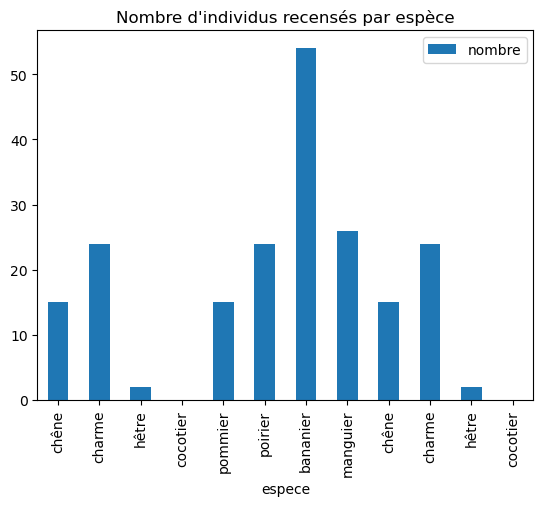

In [14]:
# Avec des lignes dupliquées
mon_histo = df_arbres.plot.bar(x='espece', y='nombre', title='Nombre d\'individus recensés par espèce')

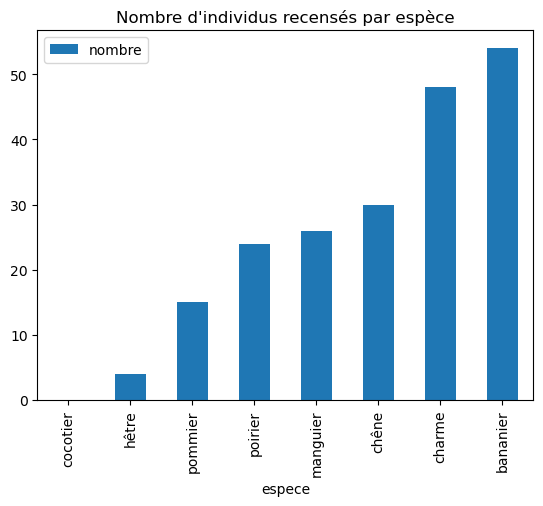

In [16]:
# Avec le résumé statistique
mon_histo = somme_arbres.sort_values('nombre').plot.bar(y='nombre', title='Nombre d\'individus recensés par espèce')

## Lire et écrire dans des fichiers avec pandas

Pandas peut générer des tableaux de données directement depuis des fichiers : par exemple csv, presse-papier, excel, sql, json, xml, ...

In [17]:
df_iris = pd.read_csv('datasets/iris.csv', index_col=0)
print(df_iris)

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
1             5.1          3.5           1.4          0.2     setosa
2             4.9          3.0           1.4          0.2     setosa
3             4.7          3.2           1.3          0.2     setosa
4             4.6          3.1           1.5          0.2     setosa
5             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
146           6.7          3.0           5.2          2.3  virginica
147           6.3          2.5           5.0          1.9  virginica
148           6.5          3.0           5.2          2.0  virginica
149           6.2          3.4           5.4          2.3  virginica
150           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


La sauvegarde d'un tableau de données dans un fichier est également extrêmement simple.

In [18]:
df_arbres.to_csv('datasets/output/inventaire.csv', sep=',')

## Visualiser des données avec pandas
### Table

Les tableaux pandas s'intègrent bien dans les Jupyter notebook si on enlève la fonction `print()`.

In [19]:
df_iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica


Les méthodes head et tail permettent de récupérer les premières et dernières lignes.

In [20]:
df_iris.head(15)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa


In [21]:
df_iris.tail(15)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
136,7.7,3.0,6.1,2.3,virginica
137,6.3,3.4,5.6,2.4,virginica
138,6.4,3.1,5.5,1.8,virginica
139,6.0,3.0,4.8,1.8,virginica
140,6.9,3.1,5.4,2.1,virginica
141,6.7,3.1,5.6,2.4,virginica
142,6.9,3.1,5.1,2.3,virginica
143,5.8,2.7,5.1,1.9,virginica
144,6.8,3.2,5.9,2.3,virginica
145,6.7,3.3,5.7,2.5,virginica


On accède aux lignes via leur index grâce à la propriété `.loc[]`

In [22]:
df_iris.loc[30:40]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
30,4.7,3.2,1.6,0.2,setosa
31,4.8,3.1,1.6,0.2,setosa
32,5.4,3.4,1.5,0.4,setosa
33,5.2,4.1,1.5,0.1,setosa
34,5.5,4.2,1.4,0.2,setosa
35,4.9,3.1,1.5,0.2,setosa
36,5.0,3.2,1.2,0.2,setosa
37,5.5,3.5,1.3,0.2,setosa
38,4.9,3.6,1.4,0.1,setosa
39,4.4,3.0,1.3,0.2,setosa


In [23]:
# Cela fonctionne aussi avec les index de type str
somme_arbres.loc['charme':'poirier']

,nombre
espece,
charme,48
chêne,30
cocotier,0
hêtre,4
manguier,26
poirier,24


On peux filtrer les lignes de cette façon :

In [24]:
df_iris[df_iris.Species == "virginica"]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
101,6.3,3.3,6.0,2.5,virginica
102,5.8,2.7,5.1,1.9,virginica
103,7.1,3.0,5.9,2.1,virginica
104,6.3,2.9,5.6,1.8,virginica
105,6.5,3.0,5.8,2.2,virginica
106,7.6,3.0,6.6,2.1,virginica
107,4.9,2.5,4.5,1.7,virginica
108,7.3,2.9,6.3,1.8,virginica
109,6.7,2.5,5.8,1.8,virginica
110,7.2,3.6,6.1,2.5,virginica


### Charts

Voici quelques possibilités simples de plot avec pandas. Ces fonctionnalités sont utiles pour visualiser l'état de vos données en cours de traitement, mais je conseille plutôt d'utiliser R et ggplot pour réaliser vos graphiques pour vos rapports et publications.

Toutes les possibilités de plotting de pandas sont [détaillées ici](https://pandas.pydata.org/docs/user_guide/visualization.html) et [là](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas-dataframe-plot).

<AxesSubplot:xlabel='Sepal.Length', ylabel='Sepal.Width'>

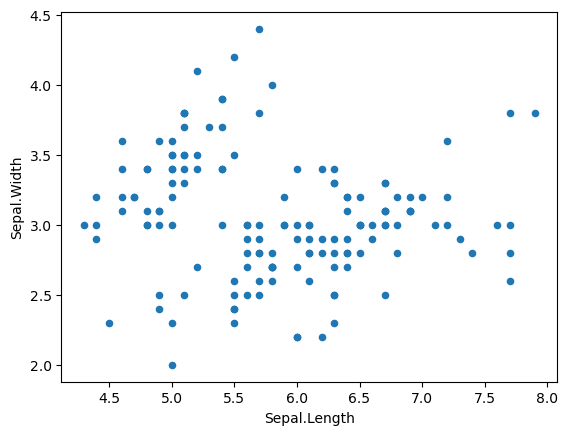

In [25]:
df_iris.plot.scatter(x='Sepal.Length', y='Sepal.Width')

<AxesSubplot:xlabel='Sepal.Length', ylabel='Sepal.Width'>

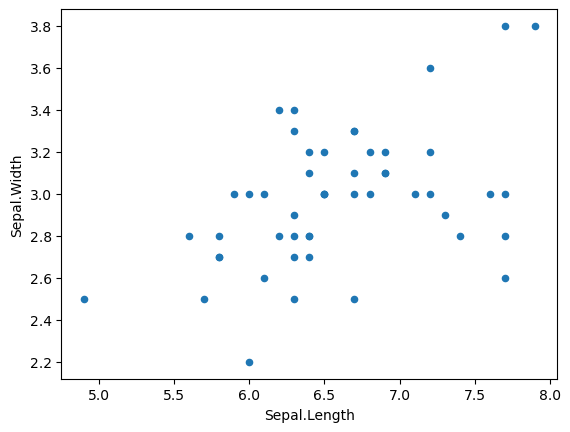

In [26]:
df_iris[df_iris.Species == "virginica"].plot.scatter(x='Sepal.Length', y='Sepal.Width')

## Récupérer des données via une API

Pour récupérer des données directement depuis une API, on va utiliser le package requests. Par exemple, l'[API Hydrométrie du portail HubEau](https://hubeau.eaufrance.fr/page/api-hydrometrie#console).

Allez chercher une station qui vous intéresse sur [le visualiseur](https://hubeau.eaufrance.fr/sites/default/files/api/demo/hydro_tr.htm).

In [49]:
# On importe tout le package requests
import requests

# On récupère le point de terminaison dans la documentation de l'API
point_terminaison = 'https://hubeau.eaufrance.fr/api/v1/hydrometrie/observations_tr'

# Les paramètres à fournir à l'API sont renseignés dans un dictionnaire dont les clés correspondent aux noms de ces paramètres
reponse = requests.get(point_terminaison,
            params = {
                'code_entite': 'V022000202',
                'grandeur_hydro': 'H',
                'size': 100,
                'sort': 'desc'
            })

# La fonction get du package requests va renvoyer un objet de type Reponse
print(reponse)

<Response [206]>


On peux vérifier à quoi correspond le code HTTP de la réponse dans la documentation de l'API. Puis on vérifie ce quelle contient.

In [54]:
print(reponse.status_code)

206


In [55]:
print(reponse.json())

{'count': 7649, 'first': 'https://hubeau.eaufrance.fr/api/v1/hydrometrie/observations_tr?code_entite=V022000202&grandeur_hydro=H&sort=desc&cursor=&size=100', 'prev': None, 'next': 'https://hubeau.eaufrance.fr/api/v1/hydrometrie/observations_tr?code_entite=V022000202&grandeur_hydro=H&sort=desc&cursor=AoJwuvmpwoQDPwxWMDIyMDAwMl9WMDIyMDAwMjAyX0hfNF8yMDIyLTExLTE3VDA4OjE1OjAw&size=100', 'api_version': '1.0.1', 'data': [{'code_site': 'V0220002', 'code_station': 'V022000202', 'grandeur_hydro': 'H', 'date_debut_serie': '2022-11-17T00:00:01Z', 'date_fin_serie': '2022-11-17T16:30:00Z', 'statut_serie': 4, 'code_systeme_alti_serie': 31, 'date_obs': '2022-11-17T16:30:00Z', 'resultat_obs': 839.0, 'code_methode_obs': 0, 'libelle_methode_obs': 'Mesure', 'code_qualification_obs': 16, 'libelle_qualification_obs': 'Non qualifiée', 'continuite_obs_hydro': True, 'longitude': 6.271047706, 'latitude': 46.150604321}, {'code_site': 'V0220002', 'code_station': 'V022000202', 'grandeur_hydro': 'H', 'date_debut_se

Pour stocker le contenu de cette réponse dans un DataFrame : 

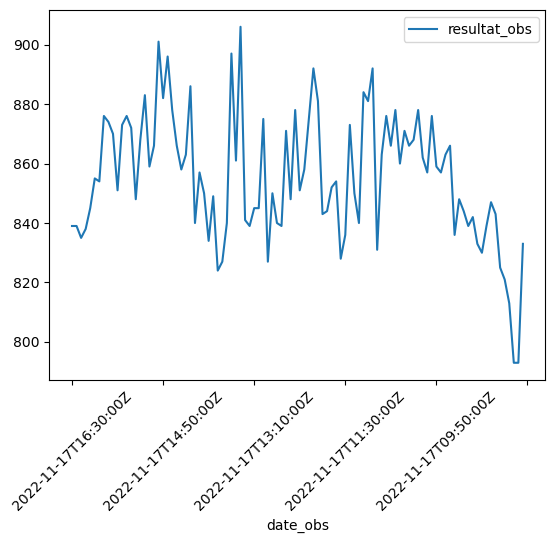

In [56]:
donnees_hydro = pd.DataFrame(reponse.json()['data'])

graph_chronique = donnees_hydro.plot.line(x='date_obs', y='resultat_obs', rot=45)

Les dates sont rangées du plus récent au plus ancien : c'est bien ce qu'on a demandé à l'API, mais ce n'est pas ce que l'on souhaite pour ce graphique. 

On peux utiliser la méthode `info()` pour vérifier le type d'objet des dates.

In [ ]:
print(donnees_hydro.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   code_site                  100 non-null    object 
 1   code_station               100 non-null    object 
 2   grandeur_hydro             100 non-null    object 
 3   date_debut_serie           100 non-null    object 
 4   date_fin_serie             100 non-null    object 
 5   statut_serie               100 non-null    int64  
 6   code_systeme_alti_serie    100 non-null    int64  
 7   date_obs                   100 non-null    object 
 8   resultat_obs               100 non-null    float64
 9   code_methode_obs           100 non-null    int64  
 10  libelle_methode_obs        100 non-null    object 
 11  code_qualification_obs     100 non-null    int64  
 12  libelle_qualification_obs  100 non-null    object 
 13  continuite_obs_hydro       100 non-null    bool   


Il existe en Python un type d'objet `datetime` spécialement concu pour les dates, fourni par le package du même nom. Pas besoin de l'importer pour l'utiliser avec pandas car pandas propose des méthodes de plus haut niveau pour effectuer la conversion.

La compréhension de liste permet de générer une liste avec une boucle sur une seule ligne :

In [59]:
colonnes_date = [col for col in donnees_hydro.columns if 'date_' in col]
print(colonnes_date)

['date_debut_serie', 'date_fin_serie', 'date_obs']


Si on voulais faire la même chose avec une boucle :

In [60]:
colonnes_date = []
for col in donnees_hydro.columns:
    if 'date_' in col:
        colonnes_date.append(col)
        
print(colonnes_date)

['date_debut_serie', 'date_fin_serie', 'date_obs']


La compréhension de liste permet de gagner quelques lignes de code et, surtout, est plus rapide à l'exécution.

Maintenant qu'on a la liste des colonnes de date, on veux convertir leur contenu en objets datetime :

In [61]:
for col in colonnes_date:
    donnees_hydro[col] = pd.to_datetime(donnees_hydro[col])

print(donnees_hydro.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   code_site                  100 non-null    object             
 1   code_station               100 non-null    object             
 2   grandeur_hydro             100 non-null    object             
 3   date_debut_serie           100 non-null    datetime64[ns, UTC]
 4   date_fin_serie             100 non-null    datetime64[ns, UTC]
 5   statut_serie               100 non-null    int64              
 6   code_systeme_alti_serie    100 non-null    int64              
 7   date_obs                   100 non-null    datetime64[ns, UTC]
 8   resultat_obs               100 non-null    float64            
 9   code_methode_obs           100 non-null    int64              
 10  libelle_methode_obs        100 non-null    object             
 11  code_qu

Reste à les mettre sur la bonne timezone :

In [62]:
for col in colonnes_date:
    donnees_hydro[col] = donnees_hydro[col].dt.tz_convert('Europe/Paris')

print(donnees_hydro.info())
donnees_hydro

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype                       
---  ------                     --------------  -----                       
 0   code_site                  100 non-null    object                      
 1   code_station               100 non-null    object                      
 2   grandeur_hydro             100 non-null    object                      
 3   date_debut_serie           100 non-null    datetime64[ns, Europe/Paris]
 4   date_fin_serie             100 non-null    datetime64[ns, Europe/Paris]
 5   statut_serie               100 non-null    int64                       
 6   code_systeme_alti_serie    100 non-null    int64                       
 7   date_obs                   100 non-null    datetime64[ns, Europe/Paris]
 8   resultat_obs               100 non-null    float64                     
 9   code_methode_obs           100 non-null    i

,code_site,code_station,grandeur_hydro,date_debut_serie,date_fin_serie,statut_serie,code_systeme_alti_serie,date_obs,resultat_obs,code_methode_obs,libelle_methode_obs,code_qualification_obs,libelle_qualification_obs,continuite_obs_hydro,longitude,latitude
0,V0220002,V022000202,H,2022-11-17 01:00:01+01:00,2022-11-17 17:30:00+01:00,4,31,2022-11-17 17:30:00+01:00,839.0,0,Mesure,16,Non qualifiée,True,6.271048,46.150604
1,V0220002,V022000202,H,2022-11-17 01:00:01+01:00,2022-11-17 17:30:00+01:00,4,31,2022-11-17 17:25:00+01:00,839.0,0,Mesure,16,Non qualifiée,True,6.271048,46.150604
2,V0220002,V022000202,H,2022-11-17 01:00:01+01:00,2022-11-17 17:30:00+01:00,4,31,2022-11-17 17:20:00+01:00,835.0,0,Mesure,16,Non qualifiée,True,6.271048,46.150604
3,V0220002,V022000202,H,2022-11-17 01:00:01+01:00,2022-11-17 17:30:00+01:00,4,31,2022-11-17 17:15:00+01:00,838.0,0,Mesure,16,Non qualifiée,True,6.271048,46.150604
4,V0220002,V022000202,H,2022-11-17 01:00:01+01:00,2022-11-17 17:30:00+01:00,4,31,2022-11-17 17:10:00+01:00,845.0,0,Mesure,16,Non qualifiée,True,6.271048,46.150604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,V0220002,V022000202,H,2022-11-17 01:00:01+01:00,2022-11-17 10:00:00+01:00,4,31,2022-11-17 09:35:00+01:00,821.0,0,Mesure,16,Non qualifiée,True,6.271048,46.150604
96,V0220002,V022000202,H,2022-11-17 01:00:01+01:00,2022-11-17 09:30:00+01:00,4,31,2022-11-17 09:30:00+01:00,813.0,0,Mesure,16,Non qualifiée,True,6.271048,46.150604
97,V0220002,V022000202,H,2022-11-17 01:00:01+01:00,2022-11-17 09:30:00+01:00,4,31,2022-11-17 09:25:00+01:00,793.0,0,Mesure,16,Non qualifiée,True,6.271048,46.150604
98,V0220002,V022000202,H,2022-11-17 01:00:01+01:00,2022-11-17 09:30:00+01:00,4,31,2022-11-17 09:20:00+01:00,793.0,0,Mesure,16,Non qualifiée,True,6.271048,46.150604


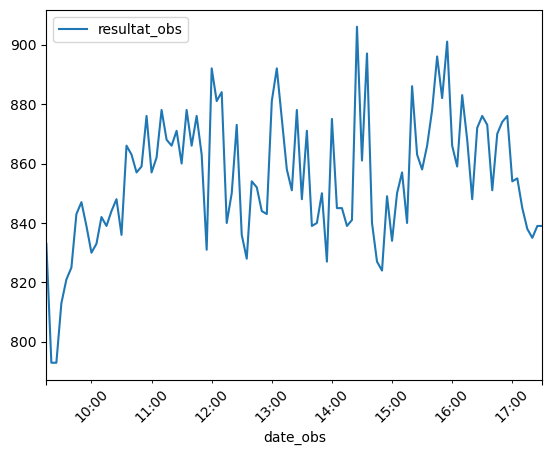

In [63]:
donnees_hydro.to_csv('datasets/output/ma_chronique.csv')

graph_chronique = donnees_hydro.plot.line(x='date_obs', y='resultat_obs', rot=45)

Maintenant récupérons les données sur plusieurs stations

In [65]:
reponse = requests.get('https://hubeau.eaufrance.fr/api/v1/hydrometrie/observations_tr',
            params = {
                'code_entite': 'V02*',
                'grandeur_hydro': 'H',
                'size': 300,
                'sort': 'desc'
            })

donnees_hydro = pd.DataFrame(reponse.json()['data'])

colonnes_date = [col for col in donnees_hydro.columns if 'date_' in col]

for col in colonnes_date:
    donnees_hydro[col] = pd.to_datetime(donnees_hydro[col])
    donnees_hydro[col] = donnees_hydro[col].dt.tz_convert('Europe/Paris')

Pour pouvoir superposer des séries sur un graphique, pandas a besoin d'un index commun (il ne peux se contenter d'une colonne). On va donc transformer la colonne date_obs en index.

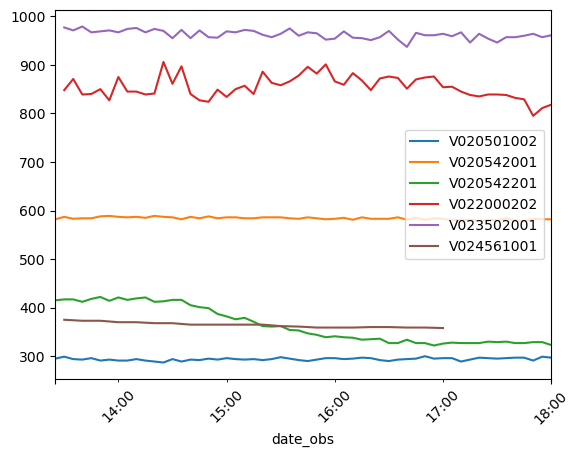

In [66]:
donnees_hydro.set_index('date_obs', inplace=True)
graph_multi_stations = donnees_hydro.groupby('code_station')['resultat_obs'].plot(rot=45, legend=True)

Maintenant que l'index est la date, on peux récupérer les données à une date précise de cette façon :

In [70]:
donnees_hydro[['code_station', 'resultat_obs']].loc['2022-11-17 17:10:00+01:00']

,code_station,resultat_obs
date_obs,,
2022-11-17 17:10:00+01:00,V020501002,289.0
2022-11-17 17:10:00+01:00,V020542001,581.0
2022-11-17 17:10:00+01:00,V020542201,327.0
2022-11-17 17:10:00+01:00,V022000202,845.0
2022-11-17 17:10:00+01:00,V023502001,967.0


## Ajouter des géométries spatiales avec geopandas

Le package geopandas ajoute la gestion des géométries spatiales à pandas. Il faut d'abord l'installer :

```bash
conda install -c conda-forge geopandas
```

Puis l'importer :

In [34]:
import geopandas as gpd

On va ensuite créer un GeoDataFrame avec des géométries spatiales de type point à partir des données latitude et longitude renvoyées par l'API.

In [35]:
gdf_hydro = gpd.GeoDataFrame(donnees_hydro, 
                             crs="EPSG:4326", 
                             geometry=gpd.points_from_xy(donnees_hydro['longitude'], donnees_hydro['latitude']))
print(gdf_hydro.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
DatetimeIndex: 300 entries, 2022-11-17 17:30:00+01:00 to 2022-11-17 12:35:00+01:00
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype                       
---  ------                     --------------  -----                       
 0   code_site                  300 non-null    object                      
 1   code_station               300 non-null    object                      
 2   grandeur_hydro             300 non-null    object                      
 3   date_debut_serie           300 non-null    datetime64[ns, Europe/Paris]
 4   date_fin_serie             300 non-null    datetime64[ns, Europe/Paris]
 5   statut_serie               300 non-null    int64                       
 6   code_systeme_alti_serie    300 non-null    int64                       
 7   resultat_obs               300 non-null    float64                     
 8   code_methode_obs           300 non-null    int64               

On peux utiliser un dataset fourni dans le package geopandas comme fond de carte et utiliser matplotlib pour générer une carte.

(40.0, 52.0)

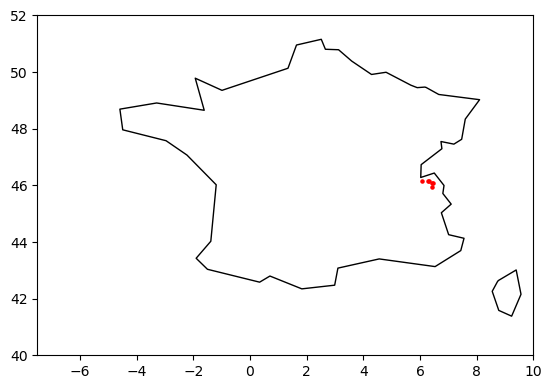

In [71]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world[world['name']=='France'].plot(color='white', edgecolor='black')

gdf_dernieres_mesures = gdf_hydro.groupby('code_station').first()
stations_map = gdf_dernieres_mesures.plot(ax=base, marker='o', color='red', markersize=5)

stations_map.set_xlim(-7.5,10)
stations_map.set_ylim(40,52)

La méthode `explore()` permet de générer rapidement un leaflet.

In [73]:
gdf_dernieres_mesures[['resultat_obs', 'geometry']].explore(     
    column="resultat_obs", # Utiliser le champ resultat_obs pour la couleur
    tooltip="code_station", # show "BoroName" value in tooltip (on hover)
    popup=True, # show all values in popup (on click)
    tiles="CartoDB positron", # use "CartoDB positron" tiles
)

On peux enregistrer notre tableau de données spatiales sur le disque (shp, gpkg, sql, ...).

In [75]:
gdf_hydro.to_file('datasets/output/stations.gpkg')
gdf_hydro = None

print(gdf_hydro)

None


Et bien sûr, recharger en mémoire un fichier existant.

In [76]:
gdf_hydro = gpd.read_file('datasets/output/stations.gpkg')
print(gdf_hydro.head())

                   date_obs code_site code_station grandeur_hydro  \
0 2022-11-17 17:30:00+01:00  V0220002   V022000202              H   
1 2022-11-17 17:25:00+01:00  V0220002   V022000202              H   
2 2022-11-17 17:20:00+01:00  V0220002   V022000202              H   
3 2022-11-17 17:15:00+01:00  V0220002   V022000202              H   
4 2022-11-17 17:10:00+01:00  V0220002   V022000202              H   

           date_debut_serie            date_fin_serie  statut_serie  \
0 2022-11-17 01:00:01+01:00 2022-11-17 17:30:00+01:00             4   
1 2022-11-17 01:00:01+01:00 2022-11-17 17:30:00+01:00             4   
2 2022-11-17 01:00:01+01:00 2022-11-17 17:30:00+01:00             4   
3 2022-11-17 01:00:01+01:00 2022-11-17 17:30:00+01:00             4   
4 2022-11-17 01:00:01+01:00 2022-11-17 17:30:00+01:00             4   

   code_systeme_alti_serie  resultat_obs  code_methode_obs  \
0                       31         839.0                 0   
1                       31        

### Pour aller plus loin avec geopandas

Geopandas permet de faire énormément de chose que l'on fait classiquement dans un SIG avec des méthodes très simples à utiliser : jointures spatiales, buffer, calculs de distance, etc.

Pour en savoir plus, [rendez-vous dans la doc !](https://geopandas.org/en/stable/getting_started/introduction.html)